In [1]:
%reset -f
!pwd

/Users/Ladand/Desktop/InsightData


Abstract
====================

Waterfowl, especially ducks and geese, are the primary reservoirs for influenza A viruses (IAVs) that evolve and emerge as important pathogens in domestic animals and humans. Although IAVs can cause high morbidity and mortality in domestic animals and humans, the low pathogenicity (LP) viruses that circulate in waterfowl don't cause clinical signs or detectable pathologic lesions in infected birds. Here we examined whether IAV infection alters the bacterial cloacal microbiome of juvenile mallards , one the most important hosts of IAVs in North America and Eurasia. We characterized bacterial community composition by sequencing 16S rRNA, calculated alpha and beta diversity measures to explore differences in OTU richness, diversity and enrichment, and performed clustering using various ordination methods and network modeling. The cloacal microbiome of IAV-infected juvenile mallards had lower species diversity, richness, and evenness than juvenile mallards that were IAV-negative.  We detected significant and robust ordination clustering based on IAV status, and OTU co-occurrence patterns also clustered differently depending on infection status. Network analysis showed that IAV-positive mallards exhibited less diversity and a smaller number of edges between highly co-occurring OTUs. By combining the results of these different approaches, we identified 39 bacterial OTUs that contribute to the differences associated with infection status: primarily *Streptococcus spp.*, *Veillonella dispar*, and *Rothia mucilaginosa*, among others. Our combination of methods showed a convincing effect of IAV infection on microbiome composition, and identified a relatively small set of OTUs that contribute to the difference.

Converting the OTU-SAMPLE Matrix to OTU-OTU Matrix
=====================

We were also interested in studying OTUs that co-occur together within a group and identifying them. Recent studies have shown that network inference techniques are a great tool for deciphering microbial relationships from co-occurrence patterns.  Thus our approach towards solving this problem was by using network analysis; in which we build a network of the OTUs based on their not only presence/absence patterns but also abundance patterns across all samples. The goal is to see if there are clusters of OTUs that have co-occured more only in one of our infection groups namely IAV+ or IAV- and thus decide whether those OTUs are infection dependent. For this reason, we can compare every pair of OTUs in one group to the same pair in the other infection group and compare the co-occurrence patterns between them. If the co-occurring pattern of each pair varies by only a little, we can ignore them (since the patterns were similar no matter what group those OTUs belonged to) otherwise if this pattern was majorly different, we study them in more details. The idea is that If there are clusters of OTUs highly co-occurring only in one group but not the other, those clusters are infection dependent. We discuss the details on how we obtained these clusters below.
After identifying clustering of IAV+$ and IAV- mallards using ordination methods and ANOVA, we performed network analysis of the two groups as follows. First, we filtered the OTU table to remove taxa present in low numbers (present in ten or fewer read counts in all samples). After filtering, 999 OTUs were identified within each group. Next, we normalized the matrix of relative OTU abundances to correct for the rare OTUs. Then we binarized the OTU abundance matrix for presence/absence of OTUs. We define each sample as a binary presence/absence vector of OTUs. Each vector was then multiplied by its transpose to obtain co-occurrence between all pairs of OTUs, and then averaged across samples, for each IAV condition, to obtain co-occurrence score for all pairs of OTUs

In [2]:
import pandas as pd
import os

path = "Data/Matrix"
IAV_pos = pd.read_csv("%s/pairwiseOTUmatrix_pos.txt" %path, delimiter="\t", header=None)
IAV_neg = pd.read_csv("%s/pairwiseOTUmatrix_neg.txt" %path, delimiter="\t", header=None)

print "IAV Positive: ",IAV_pos.shape
print "IAV Negative: ",IAV_neg.shape
IAV_neg.head(10)

IAV Positive:  (674, 674)
IAV Negative:  (674, 674)


,0,1,2,3,4,5,6,7,8,9,...,664,665,666,667,668,669,670,671,672,673
0,0.000000,0.022727,0.000000,0.022727,0.000000,0.022727,0.045455,0.045455,0.045455,0.068182,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000
1,0.022727,0.000000,0.000000,0.000000,0.022727,0.022727,0.045455,0.045455,0.045455,0.022727,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.022727,0.045455,0.022727,...,0.000000,0.022727,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.022727,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.022727,0.022727,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.022727,0.022727,0.000000,0.000000,0.000000,0.068182,0.022727,0.090909,0.136364,...,0.022727,0.022727,0.000000,0,0.022727,0.000000,0.022727,0.000000,0.022727,0.022727
5,0.022727,0.022727,0.000000,0.022727,0.000000,0.000000,0.022727,0.022727,0.068182,0.068182,...,0.000000,0.000000,0.045455,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727
6,0.045455,0.045455,0.000000,0.000000,0.068182,0.022727,0.000000,0.022727,0.113636,0.090909,...,0.022727,0.000000,0.022727,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.045455,0.045455,0.022727,0.000000,0.022727,0.022727,0.022727,0.000000,0.045455,0.045455,...,0.000000,0.022727,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.045455,0.045455,0.045455,0.022727,0.090909,0.068182,0.113636,0.045455,0.000000,0.204545,...,0.000000,0.022727,0.022727,0,0.045455,0.045455,0.068182,0.045455,0.045455,0.045455
9,0.068182,0.022727,0.022727,0.022727,0.136364,0.068182,0.090909,0.045455,0.204545,0.000000,...,0.022727,0.022727,0.022727,0,0.022727,0.022727,0.022727,0.045455,0.068182,0.022727


In [3]:
fname = open("Data/otuIDs674.csv", "rb")
OTUID_array = [str(x.strip()) for x in fname.readlines()]
Index_OTUIDs = dict(enumerate(OTUID_array))
#IAV_pos.insert(0, 'OTUID', OTUID_array)
#IAV_pos.head(10)


In [4]:

def Write_networkFiles(fname, dataframe):
    fout_dataframe = open (fname,"wb")
    print fname
    for index, row in dataframe.iterrows(): 
        for column in xrange(len(row)):
            if (index != column) and (float("%.3f" % row[column]) != 0):
                fout_dataframe.write("%s,%s,%s\n" % (Index_OTUIDs[index], Index_OTUIDs[column], float("%.5f" % row[column]) ) ) 
    fout_dataframe.close()        


flag = 0
for dataframe in [IAV_pos,IAV_neg]:
    tmp_fname = "Positive" if flag==0 else "Negative"
    flag =1
    Write_networkFiles("Data/" + str(tmp_fname) + "_network.txt", dataframe )

Data/Positive_network.txt
Data/Negative_network.txt


Visualizing the IAV networks after clustering algorithm (MCL)
==================

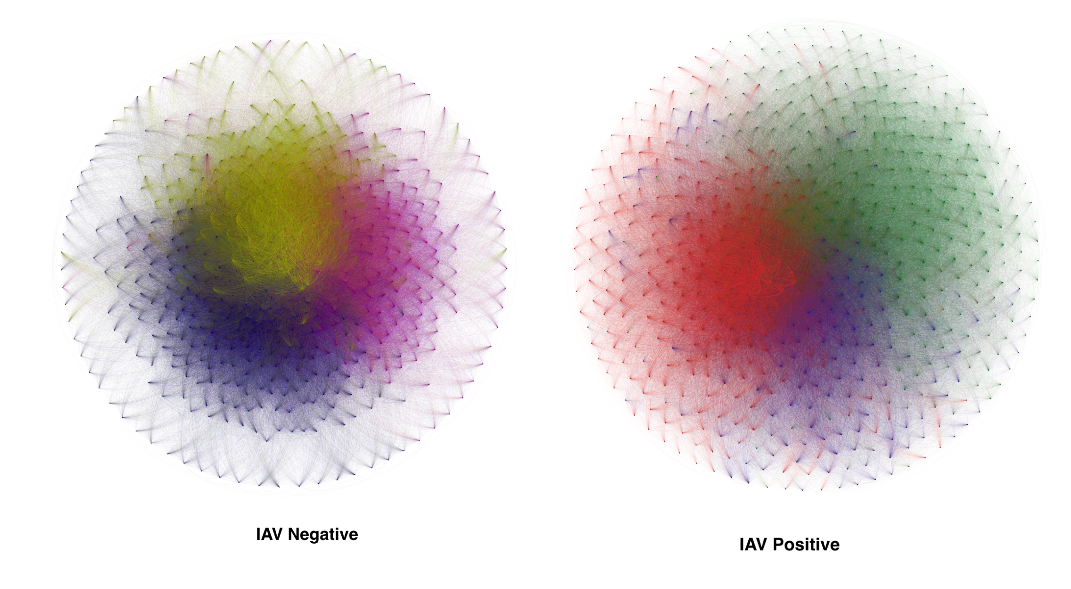

In [17]:
%matplotlib inline
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt

import csv
import random
import numpy as np
import copy
from IPython.display import display, Image
import matplotlib.image as mpimg


fig = plt.figure(figsize=(2, 8))
fig.set_size_inches(15, 15)
for root, _, files in os.walk('Images/OriginalNetworks') :
    for n,file in enumerate(files) :
        i =  mpimg.imread('Images/OriginalNetworks/' + file )
        plt.subplot(1,2,n)
        plt.imshow(i)
        plt.axis('off')
        
plt.tight_layout()

Creating Difference networks (D+ and D-) from IAV networks (IAV+ and IAV-)
---------------------------------------

We then analyzed bacterial communities in IAV+ and IAV- mallards by building two separate difference networks based on the original networks. Difference networks were calculated by measuring the value of the difference of edge weights between the two groups. Let's assume we have OTUi and OTUj with an edge between them with weight W_IAV+ in the IAV+ group. The same pair of OTUs namely (OTUi, OTUj) also occurs in the IAV- group with weight W_IAV-. We built two difference networks, D+ and D- and added both OTUi and OTUj to the difference networks as nodes. If W_IAV+ - W_IAV- was a positive score that was higher than a threshold epsilon (0.2), indicating that (OTUi, OTUj) had a stronger co-occurrence pattern in the IAV+ group, then we added an edge between (OTUi, OTUj) with weight W_IAV+ to the difference network called D+. Similarly, if W_IAV-  - W_IAV+ was higher than epsilon, we added an edge between (OTUi, OTUj) with weight W_IAV- to the other difference network called D-.
Using this technique, we extracted subnetworks from IAV+ and IAV- and called them difference networks: D+ and D-.  

Once the difference networks D+ and D- were constructed, we applied a threshold of 0.5 to remove the edges with low edge weights. Then we extracted the clusters (i.e group of nodes that are more densely connected together than to the rest of the network). The resulting clusters in the D+ and D- networks contained 55 OTUs and 80 OTUs respectively. We then examined which of the OTUs identified through the network analysis contributed the most to the differences between the IAV+ and IAV- groups. All of the network analysis were done in Python using networkx package and Gephi.

(-0.5, 1384.5, 2012.5, -0.5)

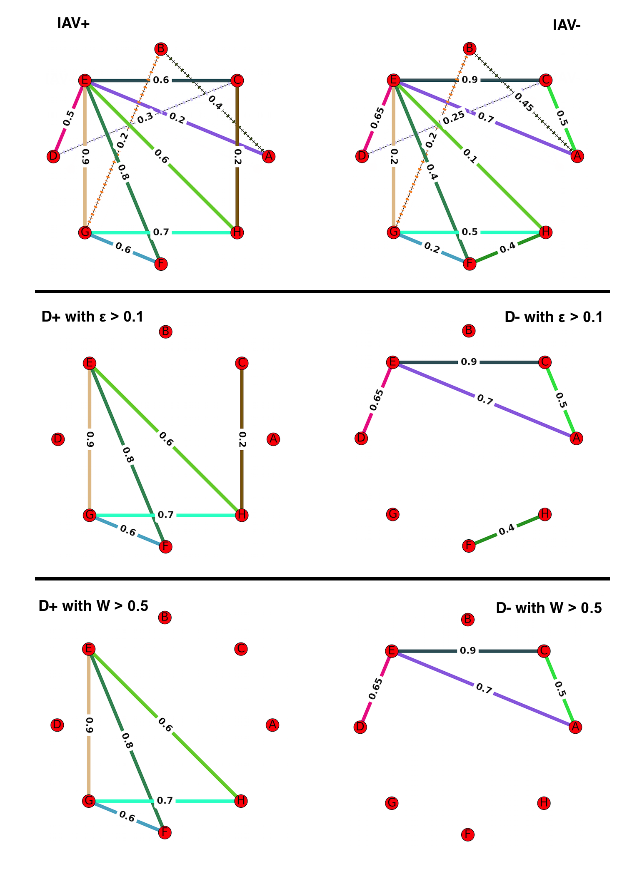

In [6]:
fig = plt.figure()
fig.set_size_inches(15, 15)
i =  mpimg.imread("Images/ToyNetwork.png" )
plt.imshow(i)
plt.axis('off')


In [9]:

import sys,argparse
import  optparse
import scipy
import pygraphviz 
from copy import deepcopy
import scipy.cluster.hierarchy as sch
import math
import pylab
from matplotlib import font_manager as fm



"""OTUID    Kingdom Phylum  Class   Order   Family  Genus   Speciex"""
def read_taxonomy():    
    Taxonomy = {}
    with open("Data/Taxonomy_index_OTU.txt", "rb") as fin:
        header = fin.next()
        for line in fin:
            arr = line.strip().split("\t")
            OTUID = str(arr[0])
            if len(arr)>=3:
                Taxonomy[OTUID] = arr[2] # Extracting Phylum levels
            else:
                Taxonomy[OTUID] = None 
    fin.close()
    print "Done with reading the Taxonomy file.\n"
    return Taxonomy

def get_phylum_color(fname):
    phylum_color = {None:"#fffff"}
    with open(fname, "rb") as f:
        for line in f:
            phylum,color = line.strip().split("\t")
            if not phylum in phylum_color:
                phylum_color[phylum] = color
    f.close()
    print "Done with reading the Phylum-color mapping file.\n"
    return phylum_color


def check_color_taxonomy_exist(u,v,Taxonomy,phylum_color):
    if v not in Taxonomy:
        Taxonomy[v] = "None"
    if Taxonomy[v] not in phylum_color:
        phylum_color[Taxonomy[v]] = "None"
        
    if u not in Taxonomy:
        Taxonomy[u] = "None"
    if Taxonomy[u] not in phylum_color:
        phylum_color[Taxonomy[u]] = "None"
    return Taxonomy,phylum_color


""" Create a network structure. Add U and V with weight W if W>THRESHOLD """
def Input_Graph(filename,Taxonomy,phylum_color):
    G=nx.Graph() 
    with open(filename ,"rb") as f:
        for line in f:
            u_v_w = line.split(",")
            if len(u_v_w) == 3:
                U = str(u_v_w[0])
                V = str(u_v_w[1])
                if U != V:
                    Taxonomy,phylum_color = check_color_taxonomy_exist(U,V,Taxonomy,phylum_color)
                    weight = float(u_v_w[2])
                    G.add_node(U, phylum = Taxonomy[U] , name=U,  color = phylum_color[Taxonomy[U]])
                    G.add_node(V, phylum = Taxonomy[V] , name=V,  color = phylum_color[Taxonomy[V]])
                    if  weight >= THRESHOLD: #if edge weight was more than threshold, add node U and V to network G
                        weight = float("%.3f" % weight) 
                        if G.has_node(U) and G.has_node(V): #sanity check
                            G.add_edge(U,V,weight=weight) # Add the egde between U and V to the graph G
            else:
                print "Bad input: the line ",line,"is not valid\n"
                sys.exit(-1)
    f.close()
    print "number of nodes %s and edges %s" %(G.number_of_nodes(), G.number_of_edges())
    return G



def Difference_network(Graph1,Graph2,Taxonomy,phylum_color):    
    G1 = deepcopy(Graph1) #IAV Positive
    G2 = deepcopy(Graph2) #IAV Negative
    G_difference_MoreIn_pos=nx.Graph() 
    G_difference_MoreIn_neg=nx.Graph() 

    fout_MoreIn_pos = open ("MoreIn_pos_%s_threshold_%s.txt" %(EPSILON, THRESHOLD), "wb")
    fout_MoreIn_neg = open ("MoreIn_neg_%s_threshold_%s.txt" %(EPSILON, THRESHOLD), "wb")

    if nx.number_of_nodes(G1) != nx.number_of_nodes(G2):
        print "Error, networks are not similar"
        return False
    
    for n1 in G1.nodes():
        for n2 in G1.nodes():
            if n1 != n2 :
                n1 = str(n1)
                n2 = str(n2)
                #Add nodes n1 and n2 to both MoreIn positive and MoreIN negative networks
                G_difference_MoreIn_neg.add_node(n1, phylum = Taxonomy[n1], name= n1, color = phylum_color[Taxonomy[n1]])
                G_difference_MoreIn_neg.add_node(n2, phylum = Taxonomy[n2], name= n2, color = phylum_color[Taxonomy[n2]])
                G_difference_MoreIn_pos.add_node(n1, phylum = Taxonomy[n1], name= n1, color = phylum_color[Taxonomy[n1]])
                G_difference_MoreIn_pos.add_node(n2, phylum = Taxonomy[n2], name= n2, color = phylum_color[Taxonomy[n2]])
                
                if G1.has_edge(n1,n2):
                    W_G1 = float(G1[n1][n2]['weight'])

                    if G2.has_edge(n1,n2):    
                        W_G2 = float(G2[n1][n2]['weight'])

                        if (W_G1 - W_G2) >EPSILON:
                            G_difference_MoreIn_pos.add_edge(n1,n2,weight = W_G1)   
                            fout_MoreIn_pos.write("%s,%s,%f\n"% (n1,n2,W_G1))
                        else:
                            if (W_G2 - W_G1) >EPSILON:
                                G_difference_MoreIn_neg.add_edge(n1,n2,weight = W_G2)
                                fout_MoreIn_neg.write("%s,%s,%f\n"% (n1,n2,W_G2) )
                    else:
                        if W_G1 > EPSILON:
                            G_difference_MoreIn_pos.add_edge(n1,n2,weight = W_G1)
                            fout_MoreIn_pos.write("%s,%s,%f\n"% (n1,n2,W_G1))
                else: #if G1 does not have an edge
                    if G2.has_edge(n1,n2): #if G2 has an edge that G1 doesn't have
                        W_G2 = float(G2[n1][n2]['weight'])
                        if W_G2 > EPSILON:
                            G_difference_MoreIn_neg.add_edge(n1,n2,weight = W_G2)
                            fout_MoreIn_neg.write("%s,%s,%f\n"% (n1,n2,W_G2) )


    print "G_difference_MoreIn_pos has %s nodes and G_difference_MoreIn_neg has %s nodes" % (nx.number_of_nodes(G_difference_MoreIn_pos), nx.number_of_nodes(G_difference_MoreIn_neg))
    print "G_difference_MoreIn_pos has %s edges and G_difference_MoreIn_neg has %s edges" % (nx.number_of_edges(G_difference_MoreIn_pos), nx.number_of_edges(G_difference_MoreIn_neg))

    fout_MoreIn_pos.close()
    fout_MoreIn_neg.close()

    path_now = os.getcwd()
    if not os.path.exists("MoreIn_neg"):
        os.makedirs("MoreIn_neg")
        nx.write_gml(G_difference_MoreIn_neg,"%s/MoreIn_neg/MoreIn_neg_differences_%s_threshold_%s.gml" %(os.getcwd(),EPSILON, THRESHOLD))

    if not os.path.exists("MoreIn_pos"):
        os.makedirs("MoreIn_pos")
        nx.write_gml(G_difference_MoreIn_pos,"%s/MoreIn_pos/MoreIn_pos_differences_%s_threshold_%s.gml" %(os.getcwd(),EPSILON, THRESHOLD))
    return True
    



def main(positive_network,negative_network):
    try:
        Taxonomy = read_taxonomy()
        phylum_color = get_phylum_color("Data/phylum_color_map.txt")
        Graph_POS= Input_Graph(positive_network, Taxonomy,phylum_color)
        Graph_NEG= Input_Graph(negative_network, Taxonomy,phylum_color)
        if Difference_network(Graph_POS,Graph_NEG,Taxonomy,phylum_color)==True:
            print "The analysis is complete!"
            pass
        return
    except:
        pass
        #print "Unexpected error:", sys.exc_info()[0]
        


THRESHOLD = float(0)
EPSILON = 0.2
#path = os.chdir("Data")
positive_network = "Data/Positive_network.txt" #otus674_ducksFIX_nopenalty_pos.txt"
negative_network = "Data/Negative_network.txt" #"otus674_ducksFIX_nopenalty_neg.txt"
main(positive_network, negative_network)

Done with reading the Taxonomy file.

Done with reading the Phylum-color mapping file.

number of nodes 674 and edges 112488
number of nodes 674 and edges 132785
G_difference_MoreIn_pos has 674 nodes and G_difference_MoreIn_neg has 674 nodes
G_difference_MoreIn_pos has 344 edges and G_difference_MoreIn_neg has 6702 edges
The analysis is complete!


In [10]:
print os.getcwd()

/Users/Ladand/Desktop/InsightData


We then filter our network by removing the edges with edge weight less than 0.5
------------------

We next filtered our OTU table for OTUs that appear in two or more samples per IAV condition resulting in 674 OTUs. We then characterized OTU co-occurrence networks across the 674 OTUs in the IAV+ and IAV- mallards and generated networks of D+ and D- groups from them. Networks of D+ and D- are subsets of the original IAV+ and IAV- co-occurrence networks with the difference that there is an edge between two OTUs if and only if those two OTUs co-occurred more (by a threshold of epsilon=0.2) in one of the groups defined by infection status. If the edge does not follow that assumption, it was removed. Once networks of D+ and D- were created, we analyzed communities of OTUs in more detail.
The network of D+ mallards had fewer edges and thus lower network density compared to the network of D- mallards. The resulting difference microbial networks also both consisted of 674 nodes (OTUs) with 344 edges in D+ and 6702 edges in D- networks with average node connections of 1.02 and 19.8 respectively. The density values were 0.002 in D+ and 0.03 in D-.

In order to identify core communities of bacteria that were associated with the presence of infection, we first applied a threshold of 0.5 for the edge weights (focusing only on important edges) and then decomposed our D+ and D- networks into modular communities to find significant community differences in co-occurrence patterns between IAV+ and IAV-. We then filtered out the clusters that are of size three or less including singletons. Both D+ and D- resulted in one cluster using Chinese whispers clustering method and MCL clustering with 55 and 80 nodes, respectively. Twenty of these OTUs were mutual between the two groups (mutual 20). Although the number of non-singleton nodes was only 1.6 times more in D- than in D+, the number of edges and their average edge weights were both nearly 5 times more. The density of the cluster in D- was also 2.4 times more than the D+ cluster. A visualization of these clusters is available below. The mutual 20 exhibited similar abundance patterns across all the samples regardless of the infection group inand may be part of the core microbiome of the mallard. 

The set of OTUs uniquely identified in D+ may be indicative of a community of bacteria that are activated in the presence of infection. Similarly, loss of OTUs in D- may indicate the presence of an infection. The obtained cluster from D- was bigger and more densely connected, whereas the D+ cluster had fewer OTUs and weaker connections. Therefore, the cluster from D- may represent stronger co-association patterns between OTUs. 


We used our difference networks to identify clusters that were highly correlated with groups of mallards based on their infection status.  Notably, 39 of the OTUs identified by network analysis overlapped with the OTUs identified by Gtest and DIROM . Interestingly, all of these OTUs were contained in the clusters retrieved from D- network. We studied the distribution of those 39 OTUs across the clusters and observed that all of them were in the core part of the cluster and had high edge weights.

OTUs identified as significant by G-test, the difference in relative occurrence metric (DIROM) and network clusters do not fully overlap. This is because these methods pick up on different contributions of variance to the data. The network analysis identifies clusters based on frequency of OTU co-occurrence within group, whereas the G-test and DIROM identify OTUs based on differential enrichment between groups. For an OTU to show up as significant in all three methods, it would need to be both differentially enriched and highly co-occurring with other OTUs. Enrichment level and co-occurrence may be independent effects of IAV, and so we would not expect to see full overlap between the two analyses. However both enrichment and co-occurrence contribute to intersample variance, so it is not unexpected for OTUs identified by G-test and OTUs from the network analysis to overlap with the highly variant OTUs, without overlapping with each other. However, our overlapping 39 OTUs were identified as significant based in the three different approaches. The intersection of the three methods contained OTUs of *Streptococcus*, *Rothia mucilaginosa*, *Veillonella dispar*, *Prevotella*, *Haemophilus*, *Mycoplasma* and an unidentified OTU from the *Lactobacillales* order.


We also examined the effect on ordination of removing OTUs identified by network analysis, as well as the overlapping 39 OTUs that were found to be significant across all methods. We first verified that Bray-Curtis distances across the 674 OTUs separated by IAV condition in PCoA space. We removed the 7 highly connected OTUs that were uniquely occurring in IAV+, the 60 highly connected OTUs that were occurring in the IAV- network, and the 20 mutual OTUs found to be highly connected in both IAV+ and IAV-. While these OTUs contribute to some of the clustering by IAV condition, we found that removal of the overlapping 39 OTUs that were significant in all methods (G-test, DIROM, network analysis) abolished the PCoA clusters; and, conversely, that IAV condition is discernible using just these 39 overlapping OTUs.



Apply some Clustering Algorithms on the Difference Networks
=======================

In [12]:
import bisect
import subprocess
import sys
import thread
import threading
import multiprocessing
import signal

def spici(fname,density_threshold=0.3):
    spici_input = "S_"+fname
    os.system("perl -p -e \"s/,/\t/g\" %s > %s" %(fname, spici_input) )
    os.system("spici -i %s -d %s -m 1 -o %s" %(spici_input,density_threshold,"SPICI_"+spici_input))
    os.system("rm -rf %s" % spici_input)
    os.system("mv SPICI_* S_%s/" %density_threshold)
    return    
    

    
def clustering(density,NUM_PROCS):
    global p
    jobs = []
#     os.chdir("Data/")
    for files in os.listdir(os.getcwd()+"/Data/"):
        if (files.find("MoreIn") != -1) and (files.find(".txt") != -1):
            os.system("mkdir S_%s" %density)
            print 'Density = %s \t start for %s' %(density,files)
            p = multiprocessing.Process(target = spici, args = (files,density, ) ) #start using a new processor
            p.daemon = True
            jobs.append(p)
            p.start()
            while ((len(jobs)>= NUM_PROCS-3)):
                for process_p in jobs: #number of open jobs is high and might freeze the system if it becomes even more. so I have to wait til 
                                       # the jobs are finished so I can start a new job.
                    if not (process_p.is_alive()):
                        process_p.join()
                        process_p.terminate()
                        jobs.remove(process_p)


    # Wait for all worker processes to finish
            for process_p in jobs:
                process_p.join()
                process_p.terminate()
            


NUM_PROCS = multiprocessing.cpu_count()
print "Number of processors are:", NUM_PROCS                                
density=[0.3,0.5,0.7]
for i in range(3):
    clustering(density[i],NUM_PROCS)
    print "------------\n"

Number of processors are: 8
Density = 0.3 	 start for MoreIn_neg_0.2_threshold_0.0.txt
Density = 0.3 	 start for MoreIn_pos_0.2_threshold_0.0.txt
------------

Density = 0.5 	 start for MoreIn_neg_0.2_threshold_0.0.txt
Density = 0.5 	 start for MoreIn_pos_0.2_threshold_0.0.txt
------------

Density = 0.7 	 start for MoreIn_neg_0.2_threshold_0.0.txt
Density = 0.7 	 start for MoreIn_pos_0.2_threshold_0.0.txt
------------



Difference_Clusters_negative.png
Difference_Clusters_positive.png


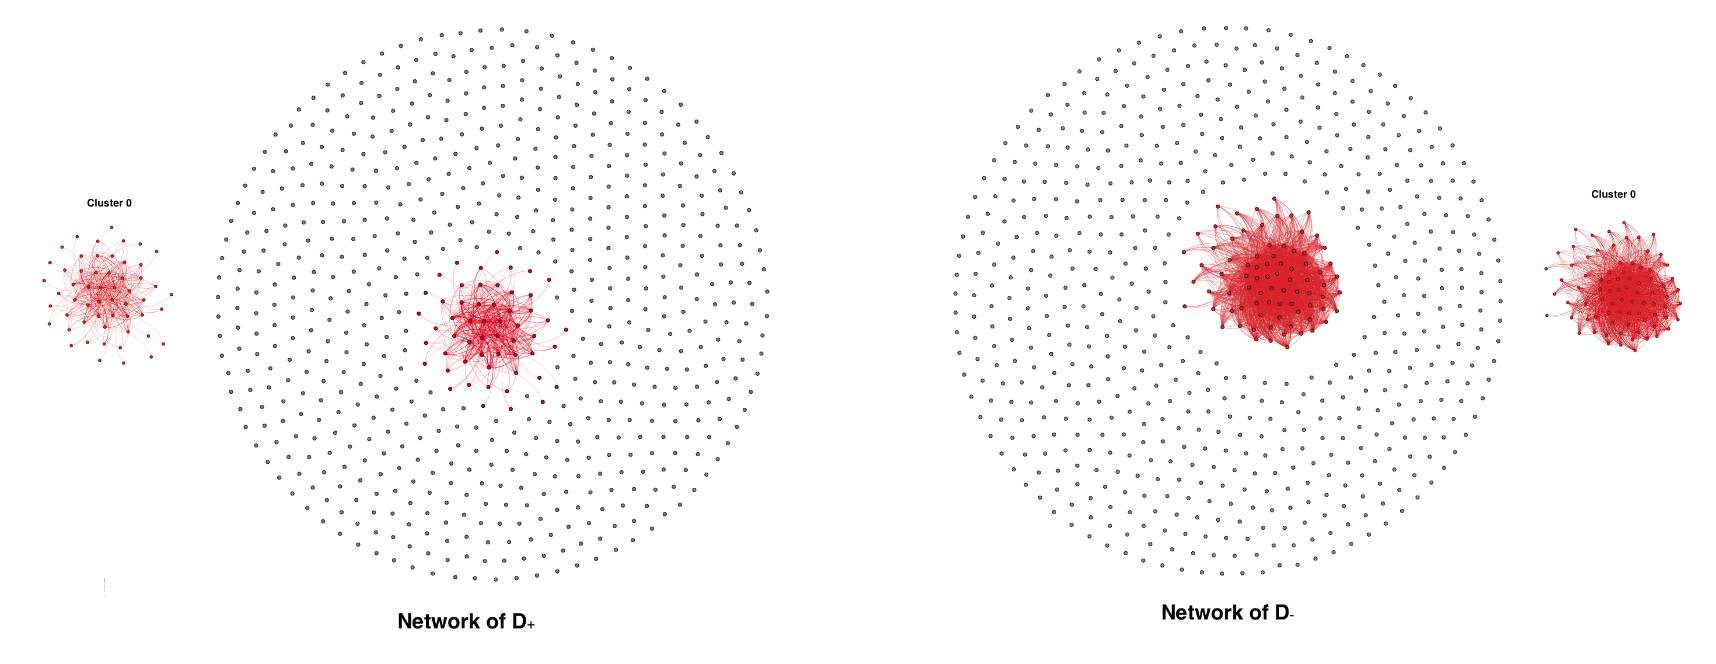

In [16]:
#path = os.chdir("/Users/Ladand/Desktop/InsightData/")
fig = plt.figure()
fig.set_size_inches(30, 30)
for root, _, files in os.walk('Images/DifferenceNetworks') :
    for n,file in enumerate(files) :
        print file
        i =  mpimg.imread('Images/DifferenceNetworks/' + file )
        plt.subplot(1,2,n)
        plt.imshow(i)
        plt.axis('off')


(-0.5, 2128.5, 1616.5, -0.5)

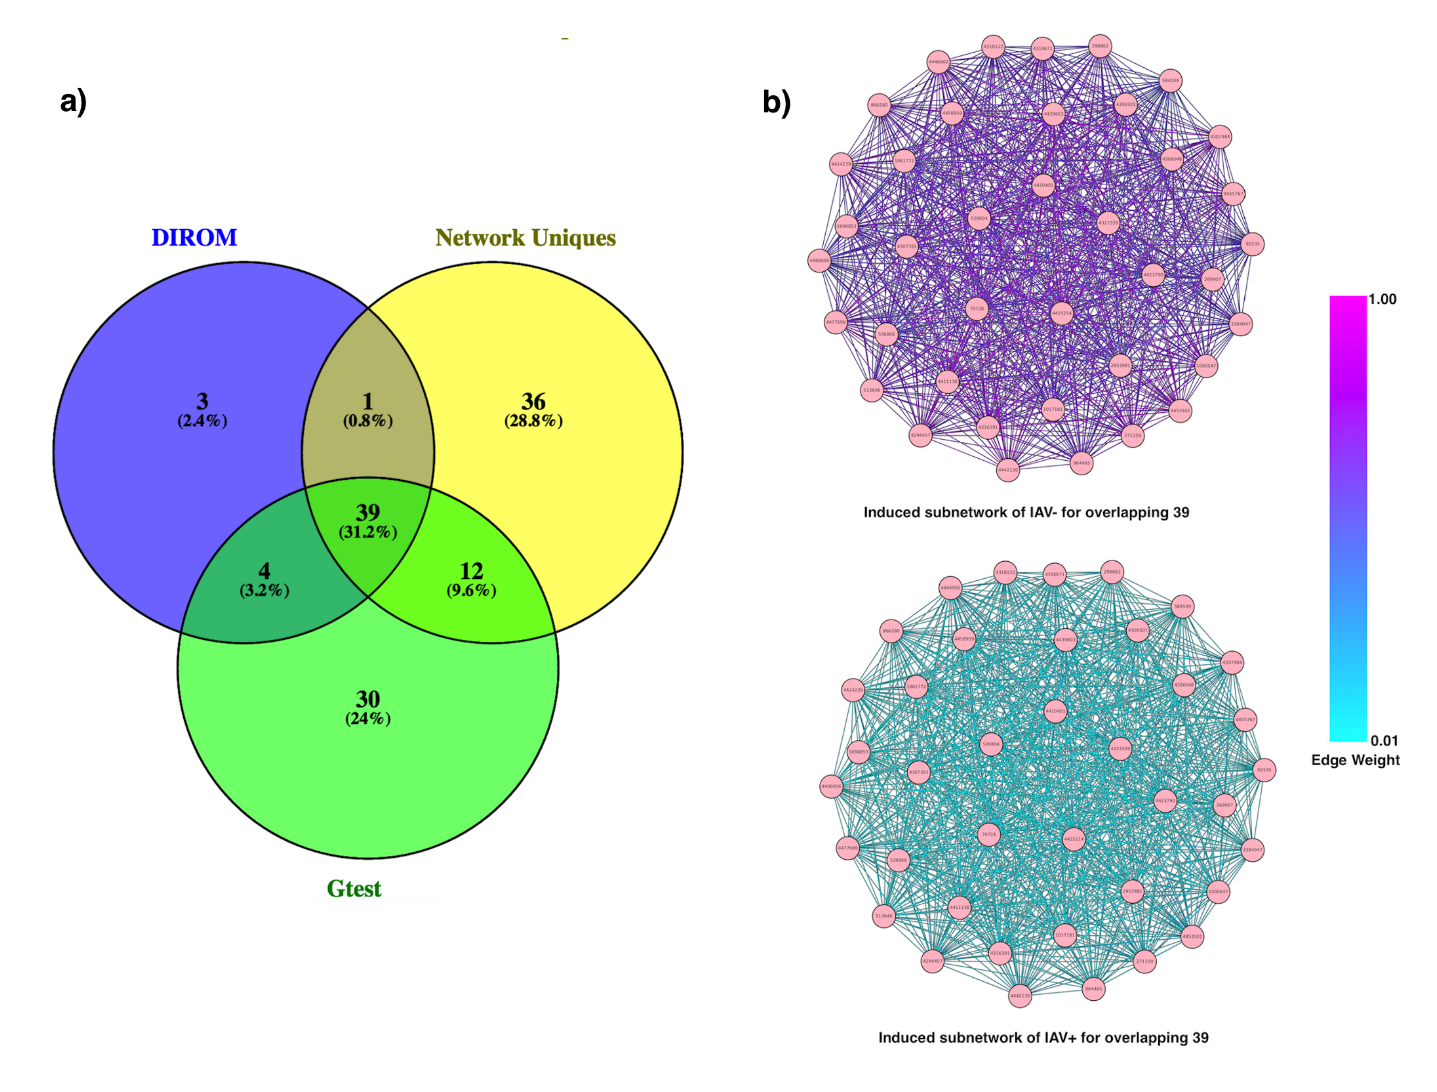

In [14]:
fig = plt.figure()
fig.set_size_inches(25, 25)
i =  mpimg.imread("Images/Merged_Vennny_39.png" )
plt.imshow(i)
plt.axis('off')


(-0.5, 1393.5, 1143.5, -0.5)

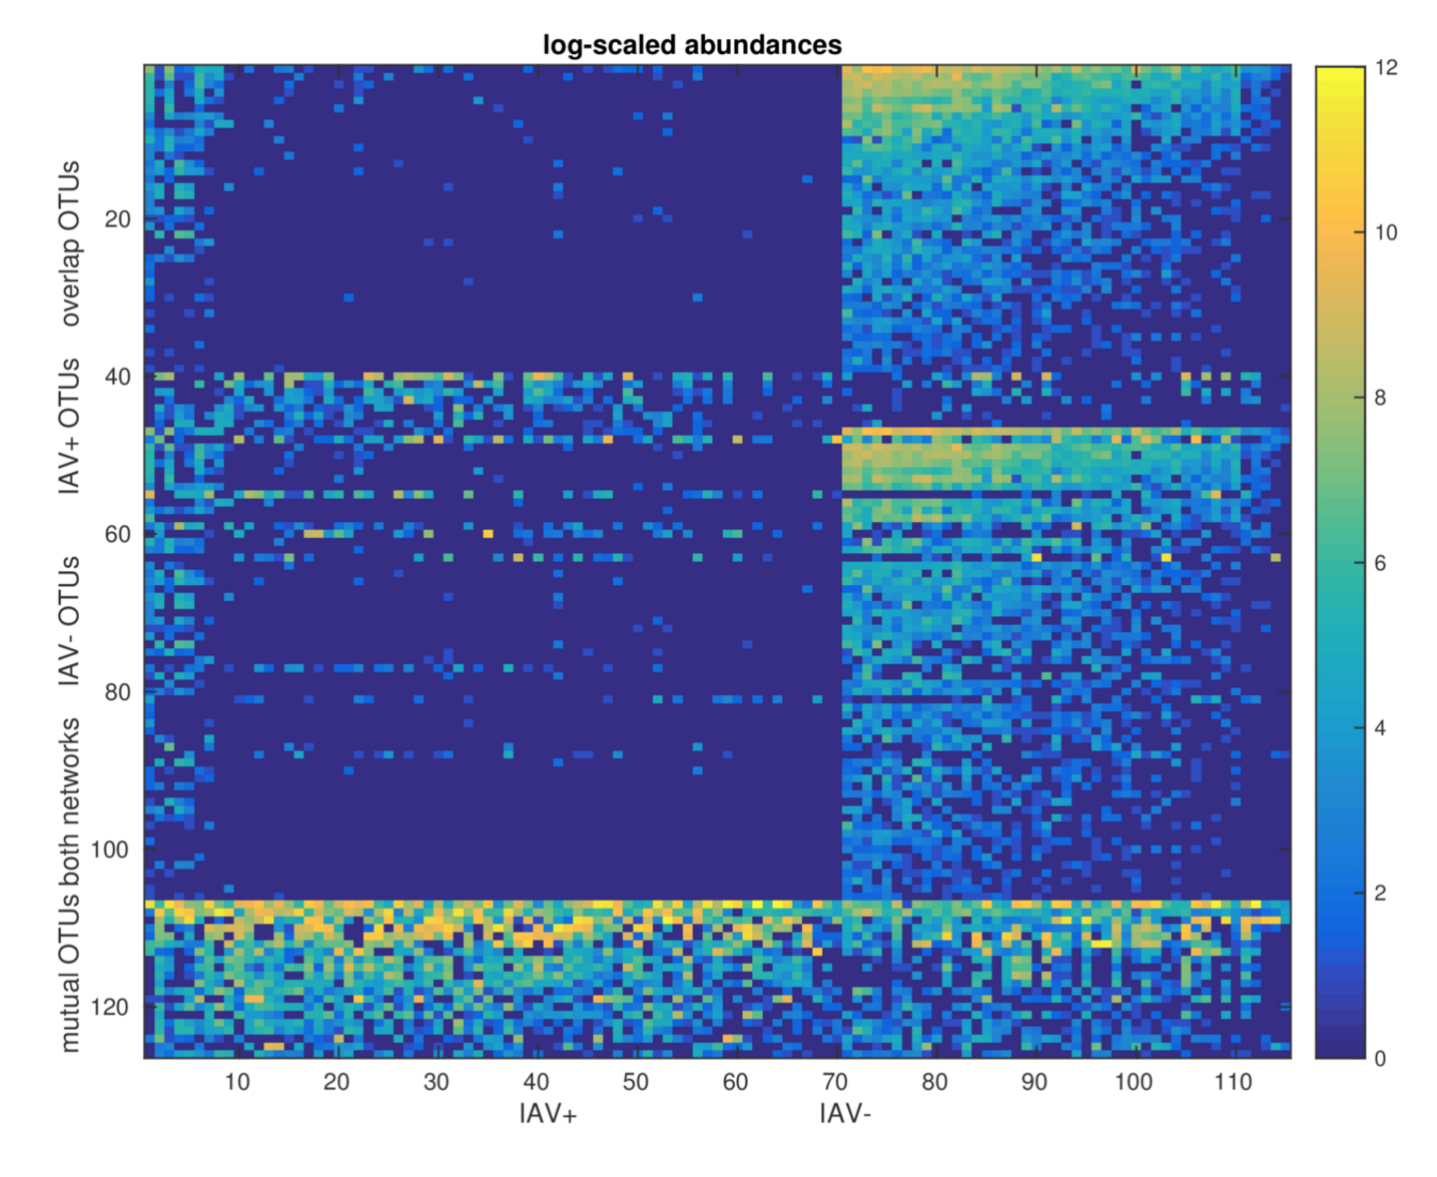

In [15]:
fig = plt.figure()
fig.set_size_inches(25, 25)
i =  mpimg.imread("Images/Heatmap.png" )
plt.imshow(i)
plt.axis('off')
